In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## 考えてみる
---
サンプルサイズは大きければ大きいほどいいのか、統計的仮説検定の実施を前提に考えてみる。

###### 練習問題

テレビの視聴率の地域差を確かめるために検定を実施したい。 ([対応のない 2 群の比の検定](2sample_independent.ipynb#%E5%AF%BE%E5%BF%9C%E3%81%AE%E3%81%AA%E3%81%842%E7%BE%A4%E3%81%AE%E6%AF%94%E7%8E%87%E3%81%AE%E5%B7%AE%E3%81%AE%E6%A4%9C%E5%AE%9A))  
仮に A 地域の視聴率の母数が $10\%$ ・ B 地域の視聴率の母数が $9\%$ だとして、各群サンプルサイズ $500$ で検定を実施したとする。このときの検定統計量 $z$ について帰無分布と標本分布をグラフ表示する。ただし、帰無分布は標本分布に合わせて標準化していない $\mathcal{N}(0, \sigma ^{2}_{D})$ を用いる。

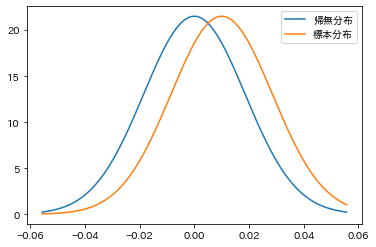

In [2]:
pa, pb = 0.1, 0.09
size = 500
p_hat = size * (pa + pb) / (size * 2)
sigma = np.sqrt(p_hat * (1 - p_hat) * 2 / size)

null_distribution = stats.norm(scale=sigma)
sample_distribution = stats.norm(loc=pa-pb, scale=sigma)

x = np.linspace(-3 * sigma, 3 * sigma, 200)
plt.plot(x, null_distribution.pdf(x), label='帰無分布')
plt.plot(x, sample_distribution.pdf(x), label='標本分布')
plt.legend()
plt.show()

###### 練習問題

上で有意水準 $\alpha =0.05$ としたときの第二種の誤りの確率 $(\beta)$ を求める。

In [3]:
z = null_distribution.isf(0.05)
sample_distribution.cdf(z)

0.8655526183174114

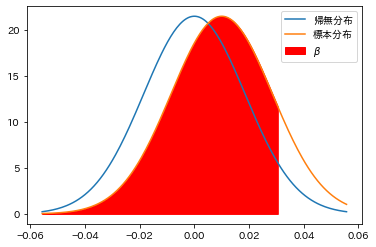

In [4]:
plt.plot(x, null_distribution.pdf(x), label='帰無分布')
plt.plot(x, sample_distribution.pdf(x), label='標本分布')
xx = np.linspace(x.min(), z, 200)
plt.fill_between(xx, sample_distribution.pdf(xx), color='red', label=r'$\beta$')
plt.legend()
plt.show()

###### 練習問題

同様に各群のサンプルサイズを 5000 とした場合の第二種の誤りの確率 $\beta$ を求める。

In [5]:
size = 5000
p_hat = size * (pa + pb) / (size * 2)
sigma = np.sqrt(p_hat * (1 - p_hat) * 2 / size)

null_distribution = stats.norm(scale=sigma)
sample_distribution = stats.norm(loc=0.1-0.09, scale=sigma)

z = null_distribution.isf(0.05)
sample_distribution.cdf(z)

0.4759264564145923

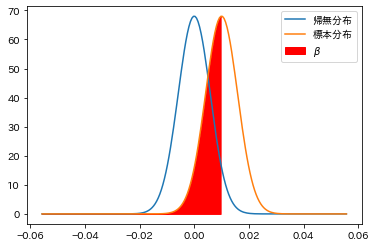

In [6]:
plt.plot(x, null_distribution.pdf(x), label='帰無分布')
plt.plot(x, sample_distribution.pdf(x), label='標本分布')
xx = np.linspace(x.min(), z, 200)
plt.fill_between(xx, sample_distribution.pdf(xx), color='red', label=r'$\beta$')
plt.legend()
plt.show()

###### 練習問題

各群のサンプルサイズは 500 のままで、 A 地域の視聴率の母数を $11\%$ ・ B 地域の視聴率の母数を $8\%$ とした場合の第二種の誤りの確率 $\beta$ を求める。

In [7]:
pa, pb = 0.11, 0.08
size = 500
p_hat = size * (pa + pb) / (size * 2)
sigma = np.sqrt(p_hat * (1 - p_hat) * 2 / size)

null_distribution = stats.norm(scale=sigma)
sample_distribution = stats.norm(loc=pa - pb, scale=sigma)

z = null_distribution.isf(0.05)
sample_distribution.cdf(z)

0.5108207310930248

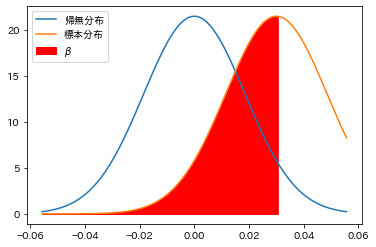

In [8]:
plt.plot(x, null_distribution.pdf(x), label='帰無分布')
plt.plot(x, sample_distribution.pdf(x), label='標本分布')
xx = np.linspace(x.min(), z, 200)
plt.fill_between(xx, sample_distribution.pdf(xx), color='red', label=r'$\beta$')
plt.legend()
plt.show()

## 効果量 (effect size)
---
2 群の平均の差が同じ 1 であるとしても、群の分散が 1 の場合と 10 の場合とでは、 2 群の差の程度が同じであるとは言えない。このような差の程度を元の単位に左右されないよう標準化した指標が効果量。  
例えば、平均の差の効果量を表す Cohen's d は以下で表される。

$$
\displaystyle \frac
    {\mu _{1} -\mu _{2}}
    {\sqrt{
        \displaystyle \frac
            {\sigma ^{2}_{1} +\sigma ^{2}_{2}}
            {2}
    }}
$$

他にもさまざまな効果量が提案されている。

## 検定力分析
---
帰無仮説が誤っている (本当に主張したい対立仮説が正しい) 場合に、正しく棄却できる確率 $( 1-\beta )$ を検定力 (power) という。

###### 練習問題

標本分布を $\mathcal{N}( 2,1)$ 、帰無分布を $\mathcal {N}( 0,1)$ 、有意水準 $\alpha =0.05$ (両側検定) とした場合に、検定力を表す領域をグラフで表示する。

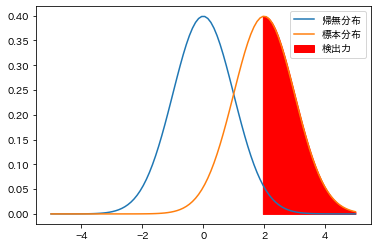

In [9]:
null_distribution = stats.norm(0, 1)
sample_distribution = stats.norm(2, 1)

x = np.linspace(-5, 5, 100)
threshold = null_distribution.isf(0.05 / 2)
xx = np.linspace(threshold, x.max(), 100)
plt.plot(x, null_distribution.pdf(x), label='帰無分布')
plt.plot(x, sample_distribution.pdf(x), label='標本分布')
plt.fill_between(xx, 0, sample_distribution.pdf(xx), color='red', label='検出力')
plt.legend()
plt.show()

検定力は、**サンプルサイズ**・**有意水準**・**効果量**の関係によって決まる。

<table class="text-center border">
    <tr>
        <th>操作</th>
        <th>検定力</th>
    </tr>
    <tr>
        <td>サンプルサイズを増やす</td>
        <td>上がる</td>
    </tr>
    <tr>
        <td>サンプルサイズを減らす</td>
        <td>下がる</td>
    </tr>
    <tr>
        <td>有意水準を大きくする</td>
        <td>上がる</td>
    </tr>
    <tr>
        <td>有意水準を小さくする</td>
        <td>下がる</td>
    </tr>
    <tr>
        <td>効果量を大きくする</td>
        <td>上がる</td>
    </tr>
    <tr>
        <td>効果量を小さくする</td>
        <td>下がる</td>
    </tr>
</table>

In [10]:
from my_functions.power_analysis import power
power.show()

interactive(children=(IntSlider(value=10, continuous_update=False, description='サンプルサイズ', max=50, min=10, step…

したがって、サンプルサイズが小さいと差があっても有意となりにくいのは当然だが、**大きすぎても実質的に意味のない差 (小さい効果量) で有意**となってしまう。  
この適切なサンプルサイズを求めたり、 $p$ 値が実際に意味のある差を表しているのかを確かめることを検定力分析という。

### 事前分析
---
検定力・有意水準・効果量を設定して、適切なサンプルサイズを求められる。

###### 練習問題

テレビの視聴率の地域差を確かめるために検定を実施したい。 ([対応のない 2 群の比の検定](2sample_independent.ipynb#%E5%AF%BE%E5%BF%9C%E3%81%AE%E3%81%AA%E3%81%842%E7%BE%A4%E3%81%AE%E6%AF%94%E7%8E%87%E3%81%AE%E5%B7%AE%E3%81%AE%E6%A4%9C%E5%AE%9A))  
差が $0.1\%$ 以下だとビジネス上の意思決定に影響を与えないため、効果量を $0.1\%$ ・有意水準 $0.05$ として、検定力 $0.8$ (効果量で設定した差がある場合に $80%$ の確率で正しい結論が出る) の検定を実施するためのサンプルサイズ (両群で同じ値を使用) を求める。  
ただし、事前の小規模な調査で片方の地域の視聴率は $10\%$ となったのでこれを基準として使用し、他方の地域はこの地域より視聴率が高いかどうかを確かめる片側検定でよい。

検定力は以下のグラフで表される領域なので、 (標準化された) 帰無分布の上側 $5\%$ 点が (帰無分布と同様に変換された) 標本分布の上側 $80\%$ 点と一致するようなサンプルサイズを求めればよい。

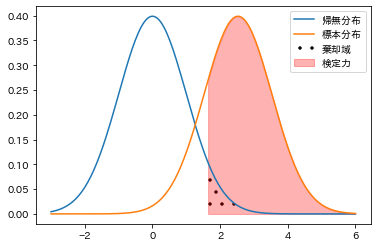

In [11]:
pa, pb = 0.1, 0.11
size = 12000
p_hat = size * (pa + pb) / (size * 2)
sigma = np.sqrt(p_hat * (1 - p_hat) * 2 / size)

null_distribution = stats.norm()
sample_distribution = stats.norm(loc=(pb - pa) / sigma)

x = np.linspace(-3, 6, 200)
plt.plot(x, null_distribution.pdf(x), label='帰無分布')
plt.plot(x, sample_distribution.pdf(x), label='標本分布')
z = null_distribution.isf(0.05)
xx = np.linspace(z, x.max(), 200)
plt.fill_between(
    xx, null_distribution.pdf(xx), facecolor='white', hatch='.', label='棄却域')
plt.fill_between(
    xx, sample_distribution.pdf(xx), color='red', alpha=0.3, label='検定力')
plt.legend()
plt.show()

標準正規分布の上側 $5\%$ 点・ $80\%$ 点の値は以下の通り。

In [12]:
null5round = np.round(stats.norm.isf(0.05), 2)
sample80round = np.round(stats.norm.isf(0.8), 2)
diff = np.round(null5round - sample80round, 2)
print(f'上側5%点 : {null5round}')
print(f'上側80%点 : {sample80round}')

上側5%点 : 1.64
上側80%点 : -0.84


標準化される前の標本分布の平均は {{pb}} - {{pa}} = {{np.round(pb-pa, 2)}} で標準偏差 $\displaystyle \sigma =\sqrt{\frac{2\hat{p}\left( 1-\hat{p}\right)}{n}}$ $\displaystyle \left(\hat{p} =\frac{0.1+0.11}{2} =0.105\right)$  
帰無分布 $\mathcal{N}( 0,\sigma )$ を標準化したときに標本分布 $\mathcal{N}( 0.01,\sigma )$ が $\mathcal{N}(${{null5round}} - ({{sample80round}}) = {{diff}}$,1)$ の正規分布となるようにすればよい。  
これは $\displaystyle z=\frac{x-\mu }{\sigma }$ ($x=$ {{np.round(pb-pa, 2)}} ・ $z=$ {{diff}} ・ $\mu =0$) という変換なので $\displaystyle \sigma =\frac{x}{z}$  
これを $n$ について解けばよいので $\displaystyle n=2\hat{p}\left( 1-\hat{p}\right)\left(\frac{z}{x}\right)^{2}$

In [13]:
pa, pb = 0.1, 0.11
p_hat = np.mean([pa, pb])

null5 = stats.norm.isf(0.05)
sample80 = stats.norm.isf(0.8)

x = pb - pa
z = null5 - sample80

n = 2 * p_hat * (1 - p_hat) * (z / x)**2
print(f'サンプルサイズ : {int(np.ceil(n))}')

サンプルサイズ : 11621


### 事後分析

サンプルサイズ・有意水準・効果量から、適切な検定力の検定が実施されたか確認できる。

### Pythonでの検定力分析の実行方法
---
実施する検定に応じて使用するものが異なる。  
statsmodelsに実装されているものについては[ドキュメント](https://www.statsmodels.org/stable/stats.html#power-and-sample-size-calculations)を参照。`*Power`が検定力を算出するためだけのもので、`*solve_power`が引数に与えなかった1つを他から算出するもの。

In [14]:
[s for s in dir(sm.stats) if s.endswith(('Power', 'solve_power'))]

['FTestAnovaPower',
 'FTestPower',
 'GofChisquarePower',
 'NormalIndPower',
 'TTestIndPower',
 'TTestPower',
 'tt_ind_solve_power',
 'tt_solve_power',
 'zt_ind_solve_power']